In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import plotly.offline as po
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
%matplotlib inline

# Feature Processing (Scikit-learn processing, etc. )
import sklearn 
import scipy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
...
# Other packages
import os, pickle
import warnings
warnings.filterwarnings("ignore")

In [142]:
data = pd.read_csv('Bank Customer Churn.csv')

### ### Data Transformation

In [143]:
transformed_data = data

In [144]:
data['gender'] = data['gender'].replace({'Male': 1, 'Female': 2})
data['country'] = data['country'].replace({'France': 1, 'Spain': 2,'Germany':3})

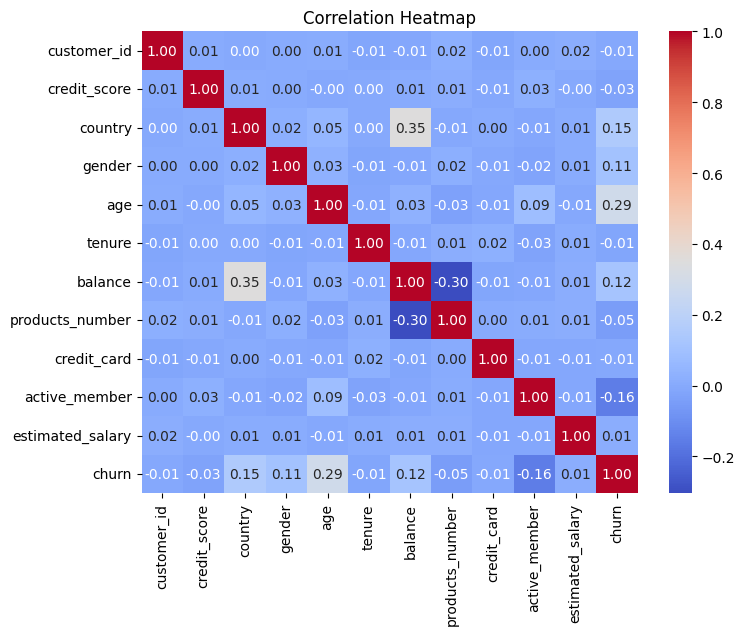

In [145]:
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [146]:
# Cap values at the 1st and 99th percentiles
def cap_outliers(df, lower_percentile=0.01, upper_percentile=0.99):
    lower_bound = df.quantile(lower_percentile)
    upper_bound = df.quantile(upper_percentile)
    return df.clip(lower=lower_bound, upper=upper_bound, axis=1)

transformed_data = cap_outliers(transformed_data)

In [147]:
y = transformed_data['churn']
X = transformed_data.drop(columns=['churn','customer_id'],axis=1)

In [148]:
X.shape

(10000, 10)

In [149]:
y.shape

(10000,)

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 10)
(2000, 10)
(8000,)
(2000,)


### K-Nearest Neighbor

In [151]:
# K-Nearest Neighbor
knnmodel = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)

In [152]:
# Use the .fit method
knnmodel = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knnmodel.fit(X_train,y_train)

KNeighborsClassifier()

In [153]:
# Use .predict method # .predict_proba is available just for classification
knn_predict=knnmodel.predict(X_test)

In [154]:
# use the accuracy_score method
knnmodel_accuracy = round(metrics.accuracy_score(y_test,knn_predict)*100,2)
print(knnmodel_accuracy)

76.5


In [155]:
ConfusionMatrix_knn = confusion_matrix(y_test, knn_predict)
print(ConfusionMatrix_knn)

[[1489   96]
 [ 374   41]]


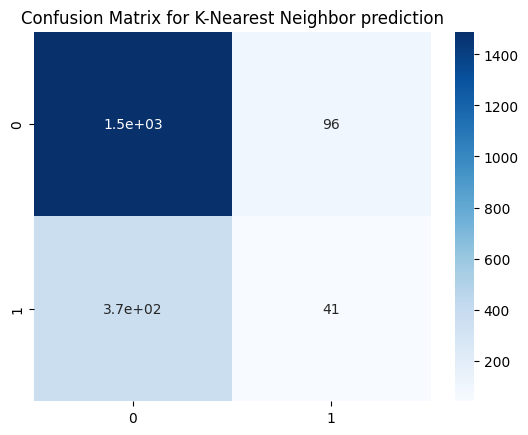

In [156]:
matrix_knn=sns.heatmap(ConfusionMatrix_knn,annot=True,cmap=plt.cm.Blues)
plt.title('Confusion Matrix for K-Nearest Neighbor prediction')
plt.show(matrix_knn)
plt.show()

### Logistic regression Model

In [157]:
# Logistic Regression Model
logregmodel = LogisticRegression()

In [158]:
# Use the .fit method
logregmodel = LogisticRegression()
logregmodel.fit(X_train, y_train)

LogisticRegression()

In [159]:
# Use .predict method # .predict_proba is available just for classification
logreg_predict=logregmodel.predict(X_test)

In [160]:
# use the accuracy_score method
logregmodel_accuracy = round(metrics.accuracy_score(y_test,logreg_predict)*100,2)
print(logregmodel_accuracy)

78.7


In [161]:
ConfusionMatrix_logreg = confusion_matrix(y_test, logreg_predict)
print(ConfusionMatrix_logreg)

[[1546   39]
 [ 387   28]]


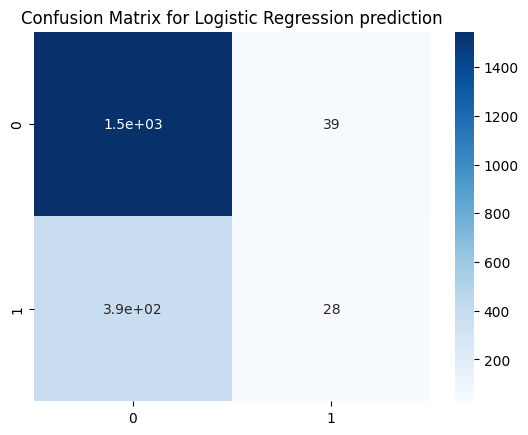

In [162]:
matrix_logreg=sns.heatmap(ConfusionMatrix_logreg,annot=True,cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression prediction')
plt.show(matrix_logreg)
plt.show()

### Random Forest Classifier

In [163]:
# Random Forest Classifier Model
rfmodel = RandomForestClassifier(n_estimators=100, criterion='entropy',random_state=1)

In [164]:
# Use the .fit method to fit the model
rfmodel = RandomForestClassifier(n_estimators=100, criterion='entropy',random_state=1)
rfmodel.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=1)

In [165]:
# Use .predict method # .predict_proba is available just for classification
rf_predict=rfmodel.predict(X_test)

In [166]:
# use the accuracy_score method
rfmodel_accuracy = round(metrics.accuracy_score(y_test,rf_predict)*100,2)
print(rfmodel_accuracy)

86.2


In [167]:
ConfusionMatrix_rf = confusion_matrix(y_test, rf_predict)
print(ConfusionMatrix_rf)

[[1531   54]
 [ 222  193]]


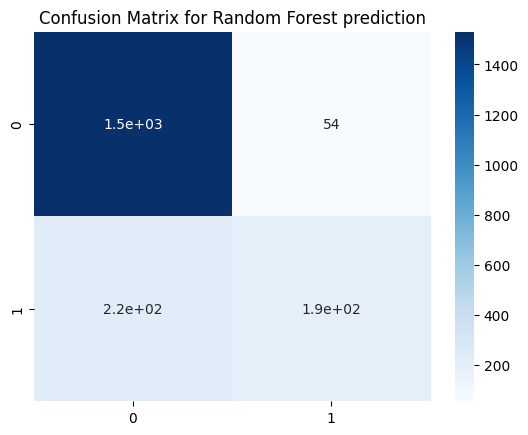

In [168]:
matrix_rf=sns.heatmap(ConfusionMatrix_rf,annot=True,cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest prediction')
plt.show(matrix_rf)
plt.show()

In [169]:
model_comparison = pd.DataFrame ({
     'Accuracy Score': [logregmodel_accuracy,knnmodel_accuracy,rfmodel_accuracy],
     'Model_Name': ['Logistic Regression','K-Nearest Neighbor','Random Forest']
   
})
model_comparison_df = model_comparison.sort_values(by='Accuracy Score',ascending=False)
model_comparison_df = model_comparison_df.set_index('Accuracy Score')
model_comparison_df.reset_index()

,Accuracy Score,Model_Name
0,86.2,Random Forest
1,78.7,Logistic Regression
2,76.5,K-Nearest Neighbor


In [170]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,1,2,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,2,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,1,2,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,1,2,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,2,43,2,125510.82,1,1,1,79084.10,0


## Testing with Sample Data

In [192]:
import numpy as np
import pandas as pd


# Define the column names used during training
columns = ['credit_score','country', 'gender', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary']
# Create a DataFrame with new input data
X_new = pd.DataFrame([[500, 'Spain', 'Female', 5, 10000, 1, 1, 1, 5000, 0]], columns=columns)



X_new['gender'] = X_new['gender'].replace({'Male': 1, 'Female': 2})
X_new['country'] = X_new['country'].replace({'France': 1, 'Spain': 2,'Germany':3})
# Make prediction using the trained Random Forest model
rf_new_predictions = rfmodel.predict(X_new)
# Print the prediction
print(rf_new_predictions)

[0]
